In [1]:
import pandas as pd
import json
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [2]:
df_abstract = pd.read_csv('distance_dim_abstract.csv', index_col=0)
df_title = pd.read_csv('distance_dim_title.csv', index_col=0)
with open('dim_sample.json') as f:
    all_data = json.load(f)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = {}
for pro_id in all_data.keys():
    for pub_id in all_data[pro_id]['publications'].keys():
        pub_data[pub_id] = all_data[pro_id]['publications'][pub_id]

data_matrix = [[0.] * len(pub_data) for _ in range(len(all_data))]
for i, pro_id in enumerate(all_data.keys()):
    for j, pub_id in enumerate(pub_data.keys()):
        belongs = 1 if pub_id in all_data[pro_id]['publications'].keys() else 0
        abs_distance = df_abstract.at[int(pro_id), pub_id]
        title_distance = df_title.at[int(pro_id), pub_id]
        try:
            dis_ratio = len(set(all_data[pro_id]['disciplines']).intersection(set(pub_data[pub_id]['disciplines'])))/len(pub_data[pub_id]['disciplines'])
        except:
            dis_ratio = 0
        data_matrix[i][j] = [belongs, abs_distance, title_distance, dis_ratio]

df = pd.DataFrame(data_matrix, index=all_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data_dim.csv')
df.head()

1  \
9852805   [1, 0.4770177934766969, 0.6402082037852634, 1.0]   
13062422  [0, 0.4299912968925837, 0.6538532962851249, 0.0]   
13528070  [0, 0.9578800465041112, 0.9704199282118572, 0.0]   
13057717   [0, 0.5609938603578163, 0.752570021680626, 0.0]   
13308163  [0, 0.6958603937180546, 0.7674873155037035, 0.0]   

                                                         1  \
9852805      [0, 0.8376637118088, 0.8686072569100991, 0.0]   
13062422  [1, 0.7354461624258486, 0.7712392884919657, 0.0]   
13528070  [0, 0.9804511838590608, 0.9804511838590608, 0.0]   
13057717   [0, 0.796247393543626, 0.1668567649431114, 0.0]   
13308163  [0, 0.8588419798477753, 0.8463375020788039, 0.0]   

                                                       1  \
9852805   [0, 0.8938996809045735, 0.8275526406400325, 0]   
13062422   [1, 0.9269565010684956, 0.771399959925187, 0]   
13528070  [0, 0.9371807691935274, 0.9114203651937512, 0]   
13057717  [0, 0.9196687874584236, 0.7977517886167266, 0]   
13308163  [0, 0.9120808779269978, 0.8030483780702649, 0]   

                                                         1  \
9852805   [0, 0.7143756593274411, 0.6072453131100991, 0.0]   
13062422  [1, 0.5345278848527452, 0.3161963171773161, 0.0]   
13528070  [0, 0.9656046236895076, 0.9415653484207304, 0.0]   
13057717   [0, 0.641505269537314, 0.5112086043295351, 0.0]   
13308163  [0, 0.7516379924300344, 0.5406773248012189, 0.0]   

                                                         1  \
9852805   [0, 0.7347445058563384, 0.8918852801874161, 0.0]   
13062422  [0, 0.5677222899744881, 0.8117673803956115, 0.0]   
13528070   [1, 0.090035699619309, 0.0169372426867534, 1.0]   
13057717  [0, 0.6670707522584944, 0.8654489773039218, 0.0]   
13308163  [0, 0.7693495348143052, 0.8735609173096806, 0.0]   

                                                         1  \
9852805     [0, 0.702570871261481, 0.759264982985414, 0.0]   
13062422  [0, 0.5152900297841297, 0.5808694416290918, 0.0]   
13528070  [0, 0.9641830707264856, 0.9641830707264856, 0.0]   
13057717  [1, 0.5988038723811216, 0.3310027440500034, 1.0]   
13308163  [0, 0.7413732479895003, 0.7184628071410879, 0.0]   

                                                         1  \
9852805   [0, 0.6281608050037335, 0.6990385060341151, 0.0]   
13062422  [0, 0.3940265168507282, 0.4760124198864632, 0.0]   
13528070  [0, 0.9552224820588764, 0.9552224820588764, 0.0]   
13057717  [1, 0.5086337309373207, 0.2987576118867443, 1.0]   
13308163  [0, 0.6766706620835792, 0.6480285451590708, 0.0]   

                                                         1  \
9852805   [0, 0.5601651779119297, 0.5987199719646268, 0.0]   
13062422  [0, 0.2832163937055523, 0.3013533124540448, 0.0]   
13528070  [0, 0.9470343312318722, 0.9402969349401046, 0.0]   
13057717   [1, 0.4300903000546855, 0.474504919387645, 0.5]   
13308163  [0, 0.6175456925143397, 0.5307070236625382, 0.0]   

                                                         1  \
9852805   [0, 0.5479655095526865, 0.6327429531509514, 0.0]   
13062422  [0, 0.2633350158723448, 0.3605888623084441, 0.0]   
13528070  [0, 0.9455652261020668, 0.9453589268594224, 0.0]   
13057717  [0, 0.4326394507164065, 0.5429409489148082, 0.0]   
13308163  [1, 0.0870472424335617, 0.1704975147340415, 1.0]   

                                                         1  \
9852805   [0, 0.6018487119687587, 0.7186421813509019, 0.0]   
13062422   [0, 0.3511466083313709, 0.510143305719117, 0.0]   
13528070    [0, 0.952053934380749, 0.958139147282863, 0.0]   
13057717  [0, 0.5002696956777806, 0.6498443291681404, 0.0]   
13308163  [1, 0.4688949848589664, 0.2516663566445761, 1.0]   

                                                         1  \
9852805   [0, 0.7391773798772965, 0.8634291544588438, 0.0]   
13062422  [0, 0.5749463915404053, 0.7622239778046763, 0.0]   
13528070  [0, 0.9685912897049151, 0.9796807777437908, 0.0]   
13057717  [0, 0.6726345707116992, 0.8300347356041349, 0.0]   
13308163  [1, 0.0260545147738

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.59987
[100]	test-logloss:0.02133
[200]	test-logloss:0.02173
[274]	test-logloss:0.02185
0.5581395348837209
0.5426356589147286
0.5271317829457365
0.5038759689922481
0.49612403100775193
0.4883720930232558
0.4573643410852713
0.3798449612403101
0.31007751937984496
0.18604651162790697


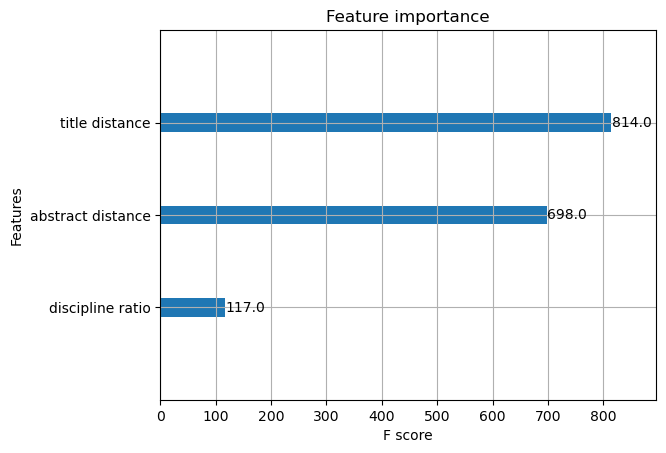

In [4]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.60313
[100]	test-logloss:0.03539
[200]	test-logloss:0.03584
[284]	test-logloss:0.03613
0.29457364341085274
0.2558139534883721
0.21705426356589147
0.17829457364341086
0.15503875968992248
0.11627906976744186
0.10077519379844961
0.06976744186046512
0.05426356589147287
0.031007751937984496


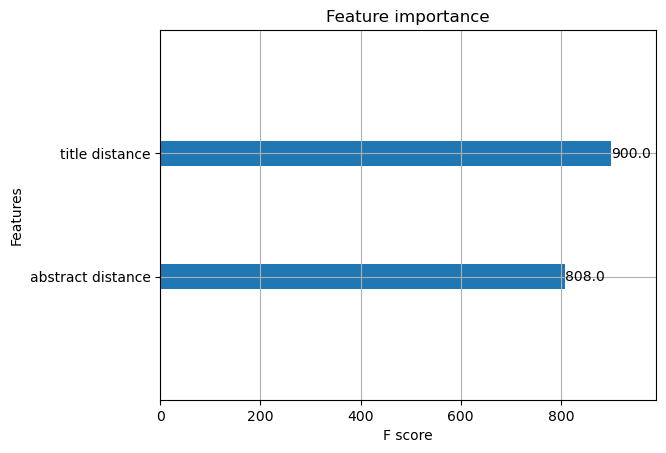

In [5]:
# drop discipline column
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

X = gb_data[:, 1:3]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [6]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [100],  
              'gamma': [1], 
              'kernel': ['rbf']}  
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

(225, 635, 4)
(142875, 4)
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
